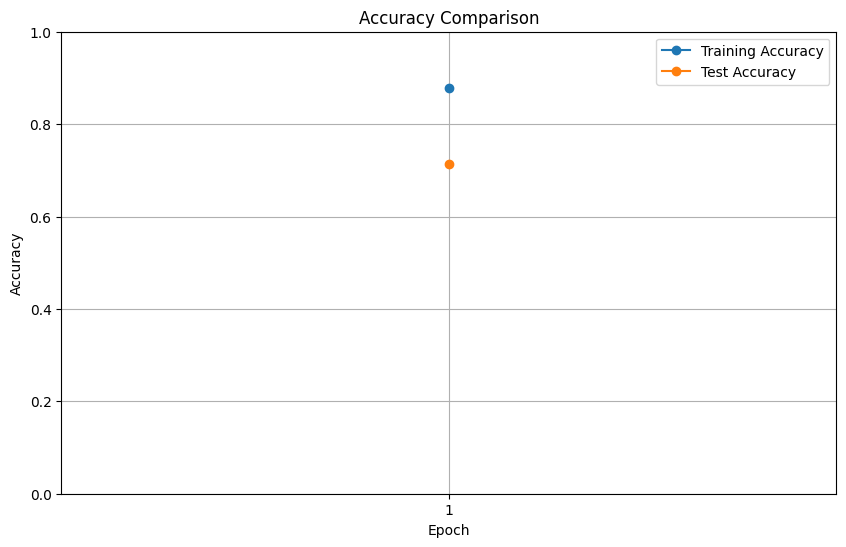

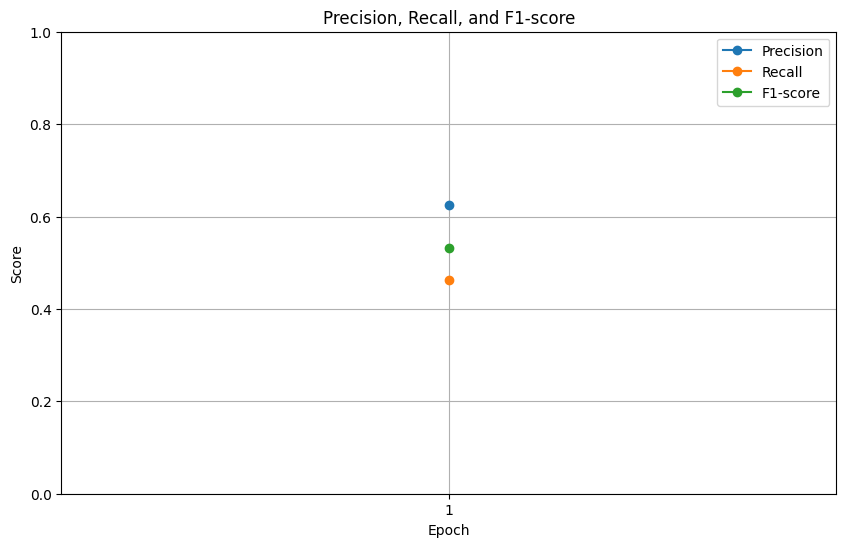

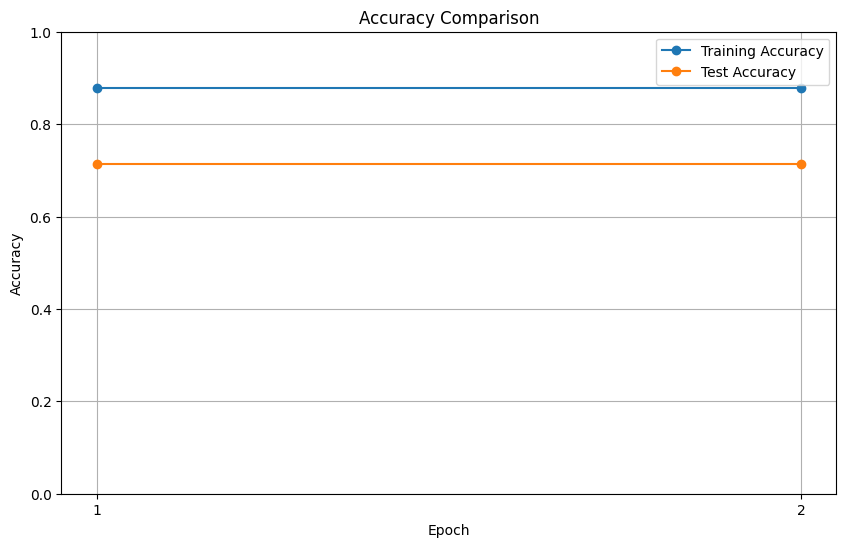

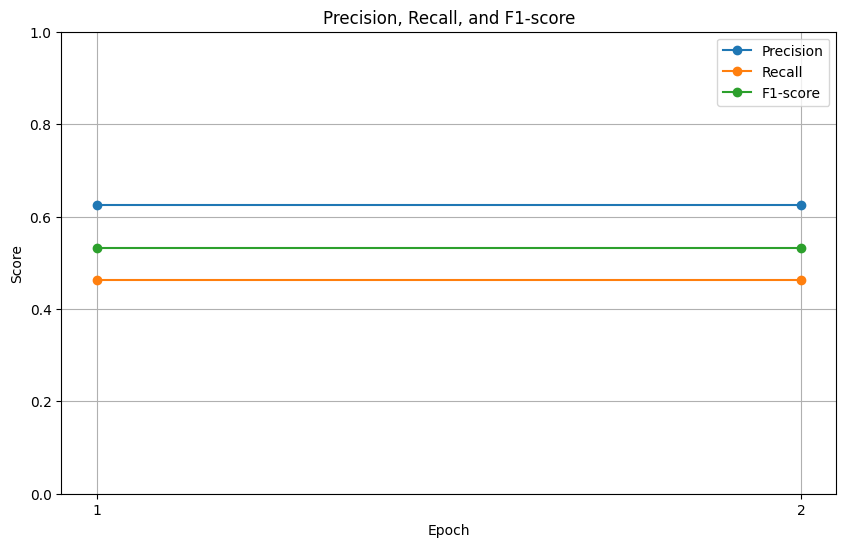

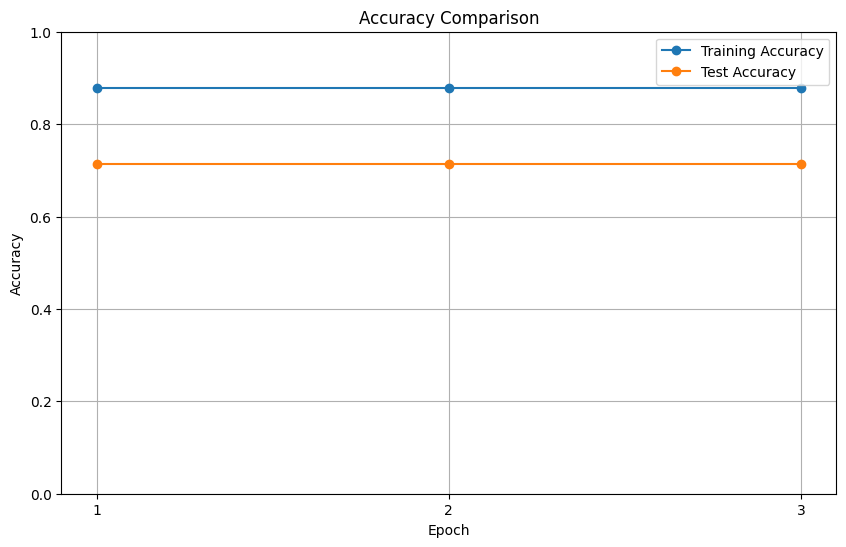

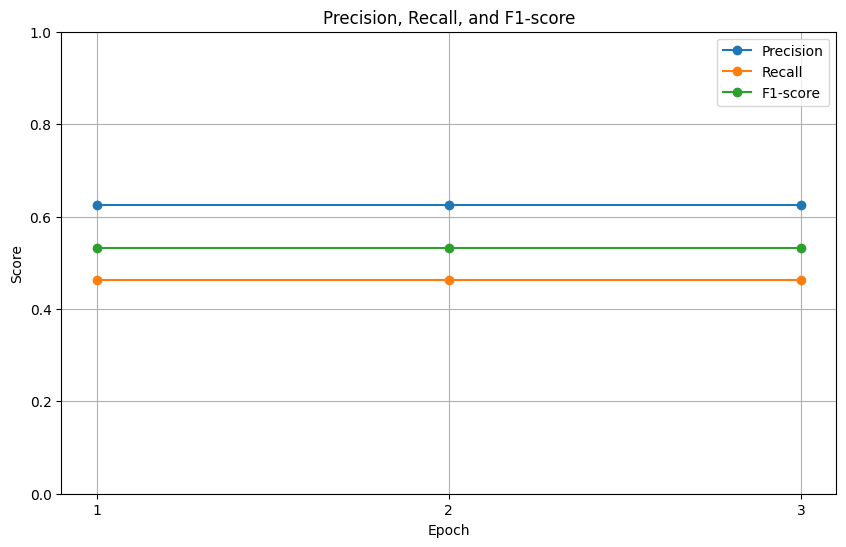

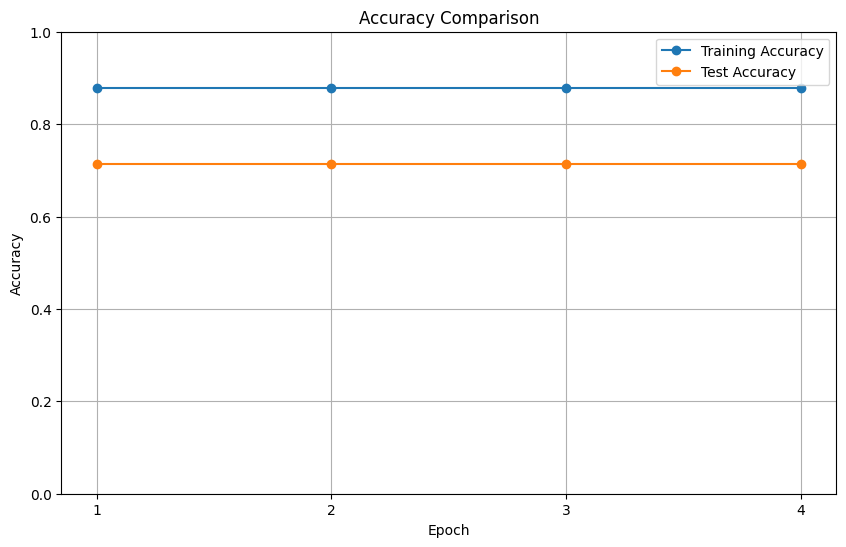

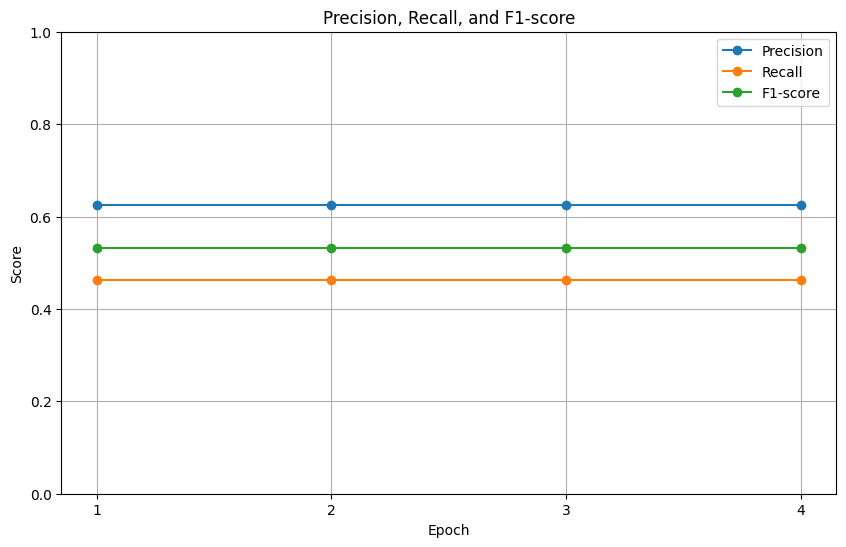

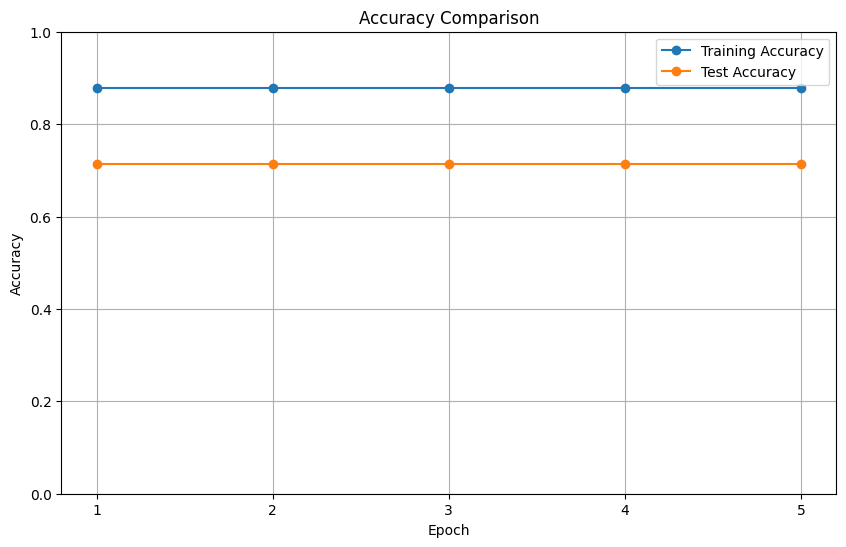

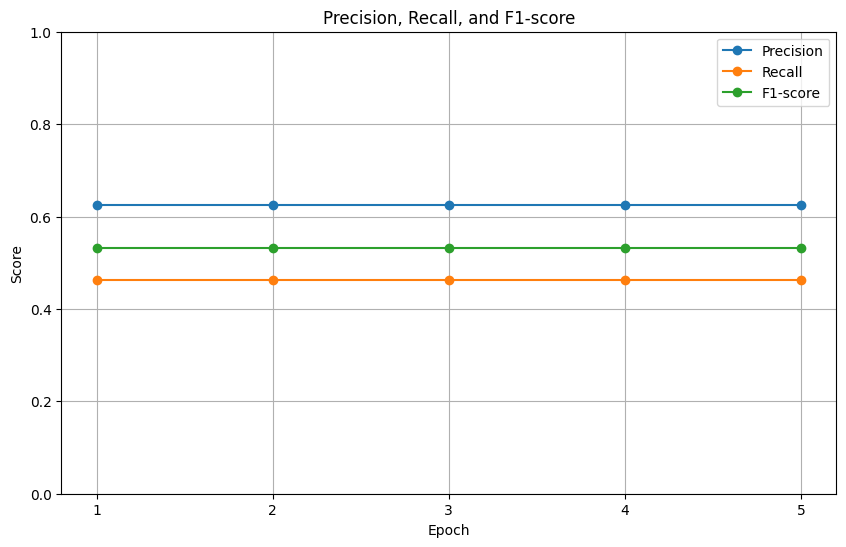

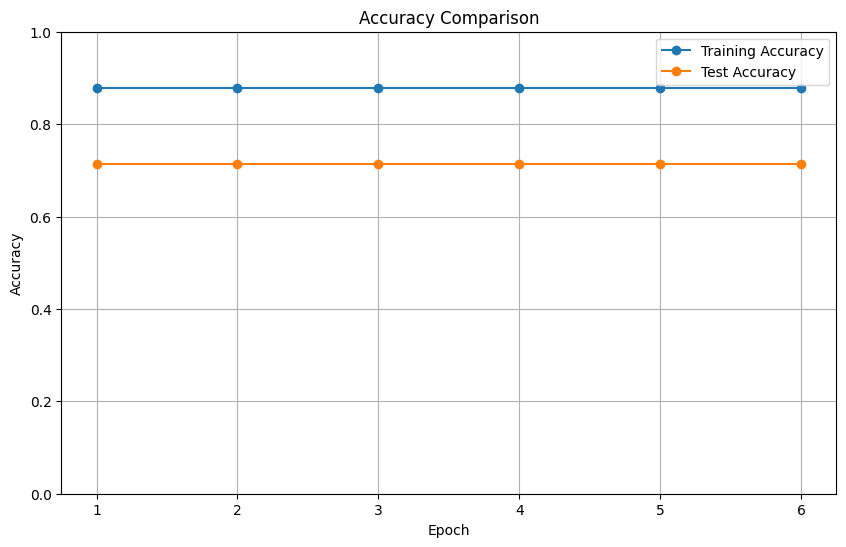

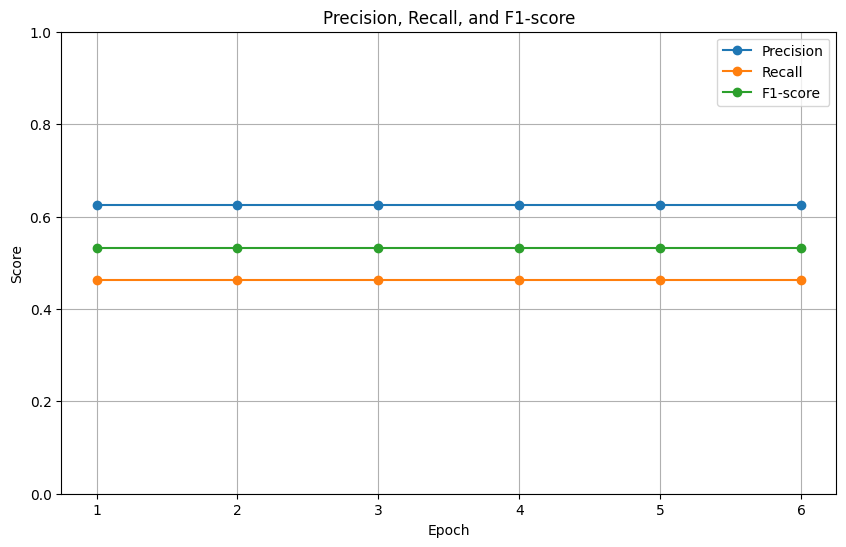

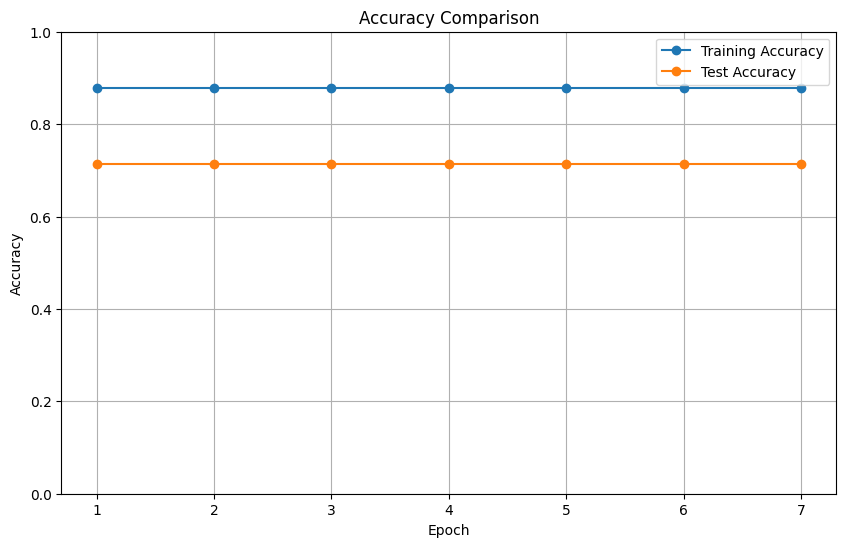

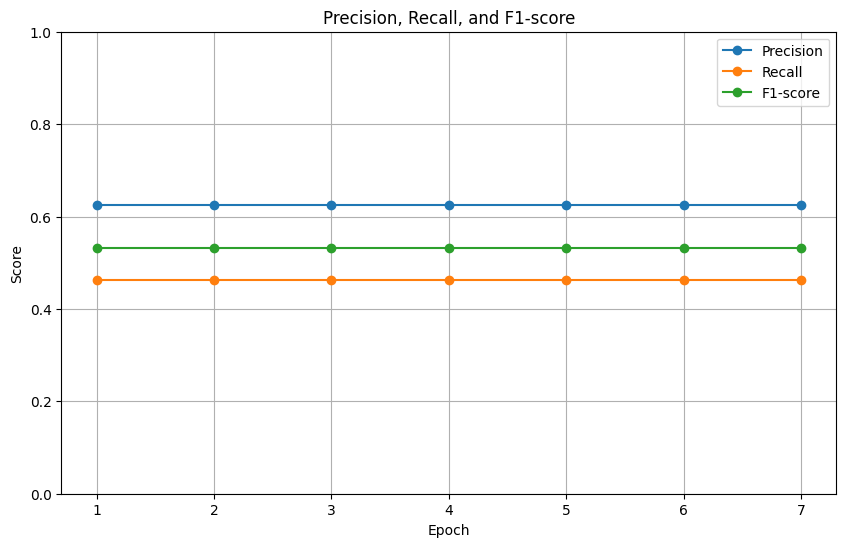

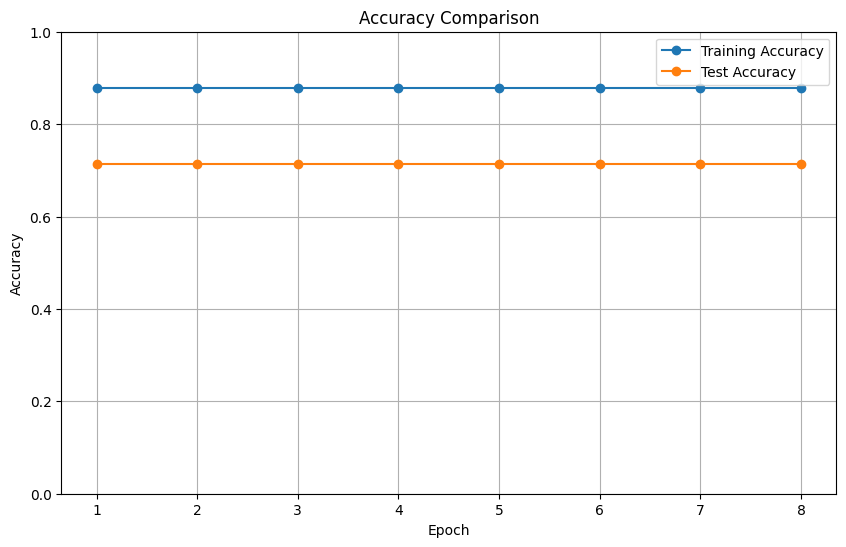

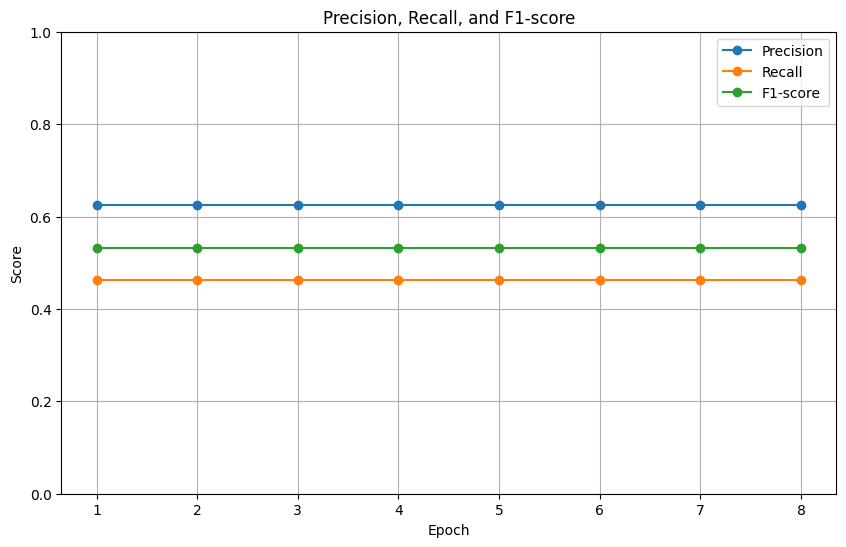

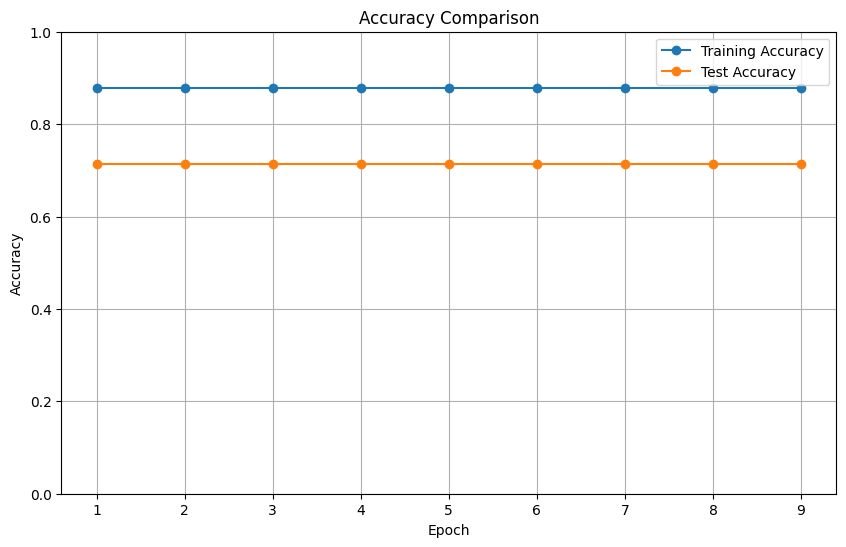

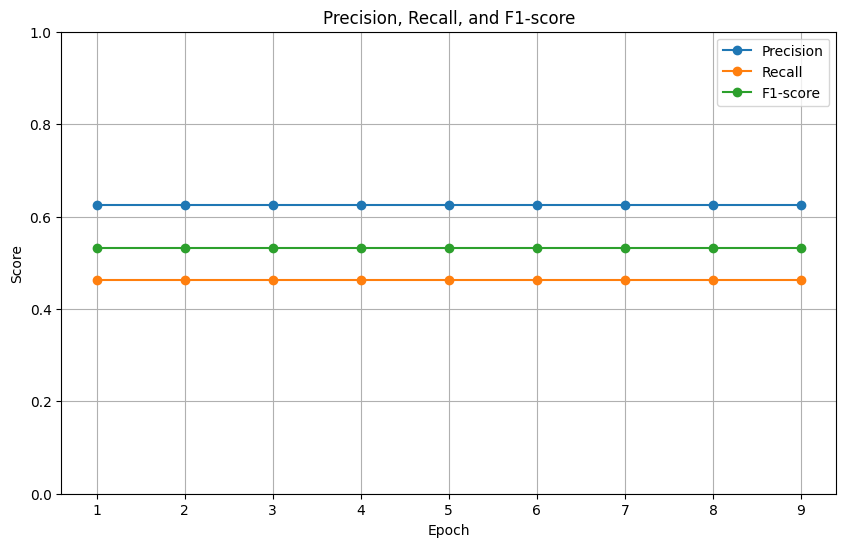

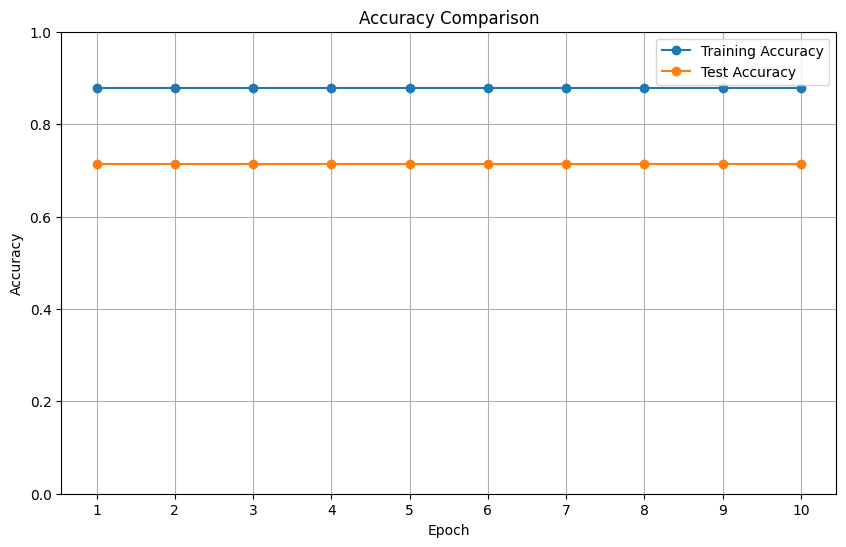

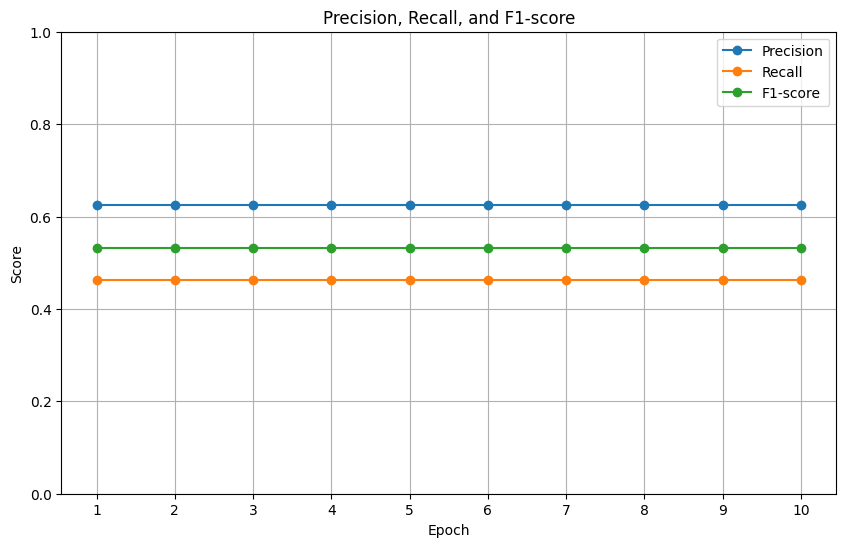

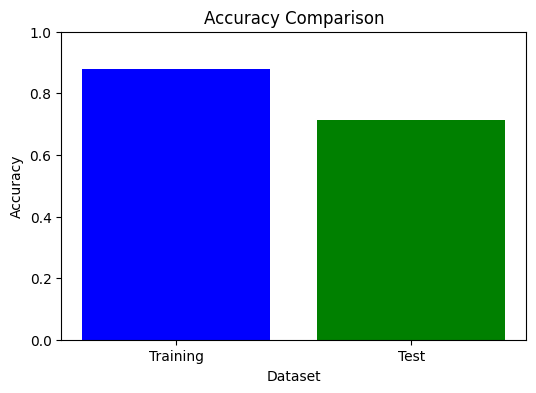

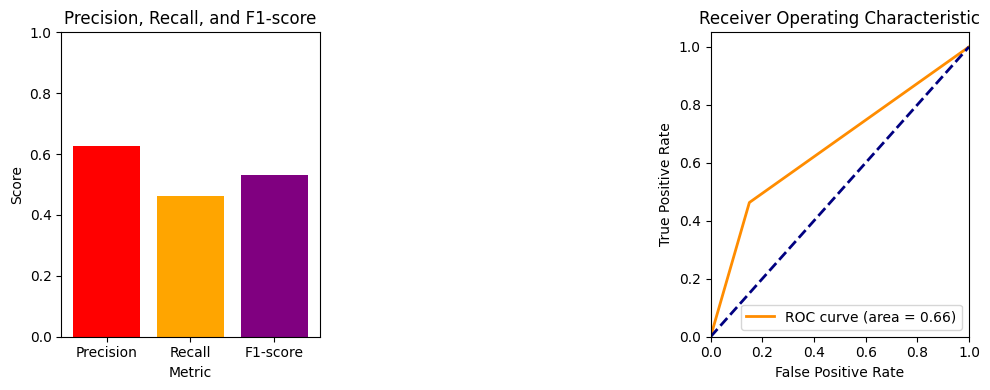

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

# Separating the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Defining the SVM classifier with RBF kernel
classifier = svm.SVC(kernel='rbf', C=10, gamma=0.1)

# Lists to store metrics for each epoch
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Training the SVM classifier epoch by epoch
epochs = 10
for epoch in range(epochs):
    # Training the SVM classifier for the current epoch
    classifier.fit(X_train, Y_train)

    # Predictions
    Y_train_pred = classifier.predict(X_train)
    Y_test_pred = classifier.predict(X_test)

    # Model Evaluation
    accuracy_train = accuracy_score(Y_train, Y_train_pred)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    precision = precision_score(Y_test, Y_test_pred)
    recall = recall_score(Y_test, Y_test_pred)
    f1 = f1_score(Y_test, Y_test_pred)

    # Appending metrics to lists
    train_accuracy_list.append(accuracy_train)
    test_accuracy_list.append(accuracy_test)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Visualization for Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epoch+2), train_accuracy_list, label='Training Accuracy', marker='o')
    plt.plot(range(1, epoch+2), test_accuracy_list, label='Test Accuracy', marker='o')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.xticks(range(1, epoch+2))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization for Precision, Recall, and F1-score
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epoch+2), precision_list, label='Precision', marker='o')
    plt.plot(range(1, epoch+2), recall_list, label='Recall', marker='o')
    plt.plot(range(1, epoch+2), f1_list, label='F1-score', marker='o')
    plt.title('Precision, Recall, and F1-score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.ylim([0, 1])
    plt.xticks(range(1, epoch+2))
    plt.legend()
    plt.grid(True)
    plt.show()

# Rest of the code remains the same
# Visualization for Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Training', 'Test'], [accuracy_train, accuracy_test], color=['blue', 'green'])
plt.title('Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


# Visualization for Precision, Recall, and F1-score
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.bar(['Precision', 'Recall', 'F1-score'], [precision, recall, f1], color=['red', 'orange', 'purple'])
plt.title('Precision, Recall, and F1-score')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim([0, 1])



#Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)
# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
roc_auc = auc(fpr, tpr)

# ROC Curve Visualization
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
# Reusing the code for user input prediction
while True:
    input_str = input("Enter comma-separated values (e.g., 5,6,2,9,0,25.8,0,0): ")
    input_data = tuple(map(float, input_str.split(',')))

    # Changing the input_data to numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape the array as we are predicting for one instance
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    # Standardize the input data
    std_data = scaler.transform(input_data_reshaped)

    # Predict
    prediction = classifier.predict(std_data)

    if prediction[0] == 0:
        print('For input:', input_data, '-- The person is not diabetic')
    else:
        print('For input:', input_data, '-- The person is diabetic')

    # Ask if the user wants to continue
    another_input = input("Do you want to enter another input? (yes/no): ")
    if another_input.lower() != 'yes':
        break

Enter comma-separated values (e.g., 5,6,2,9,0,25.8,0,0): 1,73,50,10,0,23,0.248,21


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


For input: (1.0, 73.0, 50.0, 10.0, 0.0, 23.0, 0.248, 21.0) -- The person is not diabetic
Do you want to enter another input? (yes/no): yes
Enter comma-separated values (e.g., 5,6,2,9,0,25.8,0,0): 0,109,88,30,0,32.5,0.855,38


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


For input: (0.0, 109.0, 88.0, 30.0, 0.0, 32.5, 0.855, 38.0) -- The person is diabetic
Do you want to enter another input? (yes/no): no
